<a href="https://colab.research.google.com/github/codebluecruz/Getting-started-with-github/blob/master/FO_onFinalWebmd_With_HO__RF_RS_ROC_Vtreat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, 
#increasing interpretability but at the same time minimizing information loss. It does so by creating new
# uncorrelated variables that successively maximize variance
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

In [51]:
#Loading our dataset
sdss_df = pd.read_csv('WebMd_Final_withSR.csv', skiprows=0)

In [52]:
sdss_df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Sentiment_Rating,Sex,Sides,UsefulCount,Satisfaction
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,5
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,5
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,5,Female,,0,3
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,1
4,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,1


In [53]:
sdss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99988 entries, 0 to 99987
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99988 non-null  object
 1   Condition         99988 non-null  object
 2   Date              99988 non-null  object
 3   Drug              99988 non-null  object
 4   DrugId            99988 non-null  int64 
 5   EaseofUse         99988 non-null  int64 
 6   Effectiveness     99988 non-null  int64 
 7   Reviews           99988 non-null  object
 8   Sentiment_Rating  99988 non-null  int64 
 9   Sex               99988 non-null  object
 10  Sides             99988 non-null  object
 11  UsefulCount       99988 non-null  int64 
 12  Satisfaction      99988 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 9.9+ MB


In [54]:
sdss_df.describe()

,DrugId,EaseofUse,Effectiveness,Sentiment_Rating,UsefulCount,Satisfaction
count,99988.000000,99988.000000,99988.000000,99988.000000,99988.000000,99988.000000
mean,31735.897668,4.028193,3.513882,3.300116,6.689393,3.113674
std,48797.503040,1.303018,1.429267,1.777164,9.086882,1.592108
min,43.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2798.000000,3.000000,3.000000,1.000000,1.000000,1.000000
50%,8486.000000,5.000000,4.000000,4.000000,4.000000,3.000000
75%,20663.000000,5.000000,5.000000,5.000000,9.000000,5.000000
max,178044.000000,5.000000,5.000000,5.000000,154.000000,5.000000


In [55]:
# Showing each class in Satisfaction column of our dataset named "sdss_df"
# classes = 1,2,3,4,5 
sdss_df['Satisfaction'].value_counts()

5    29168
1    27494
4    18055
3    15234
2    10037
Name: Satisfaction, dtype: int64

In [56]:
# printing all column names for our target dataset
sdss_df.columns.values

array(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Sentiment_Rating', 'Sex', 'Sides',
       'UsefulCount', 'Satisfaction'], dtype=object)

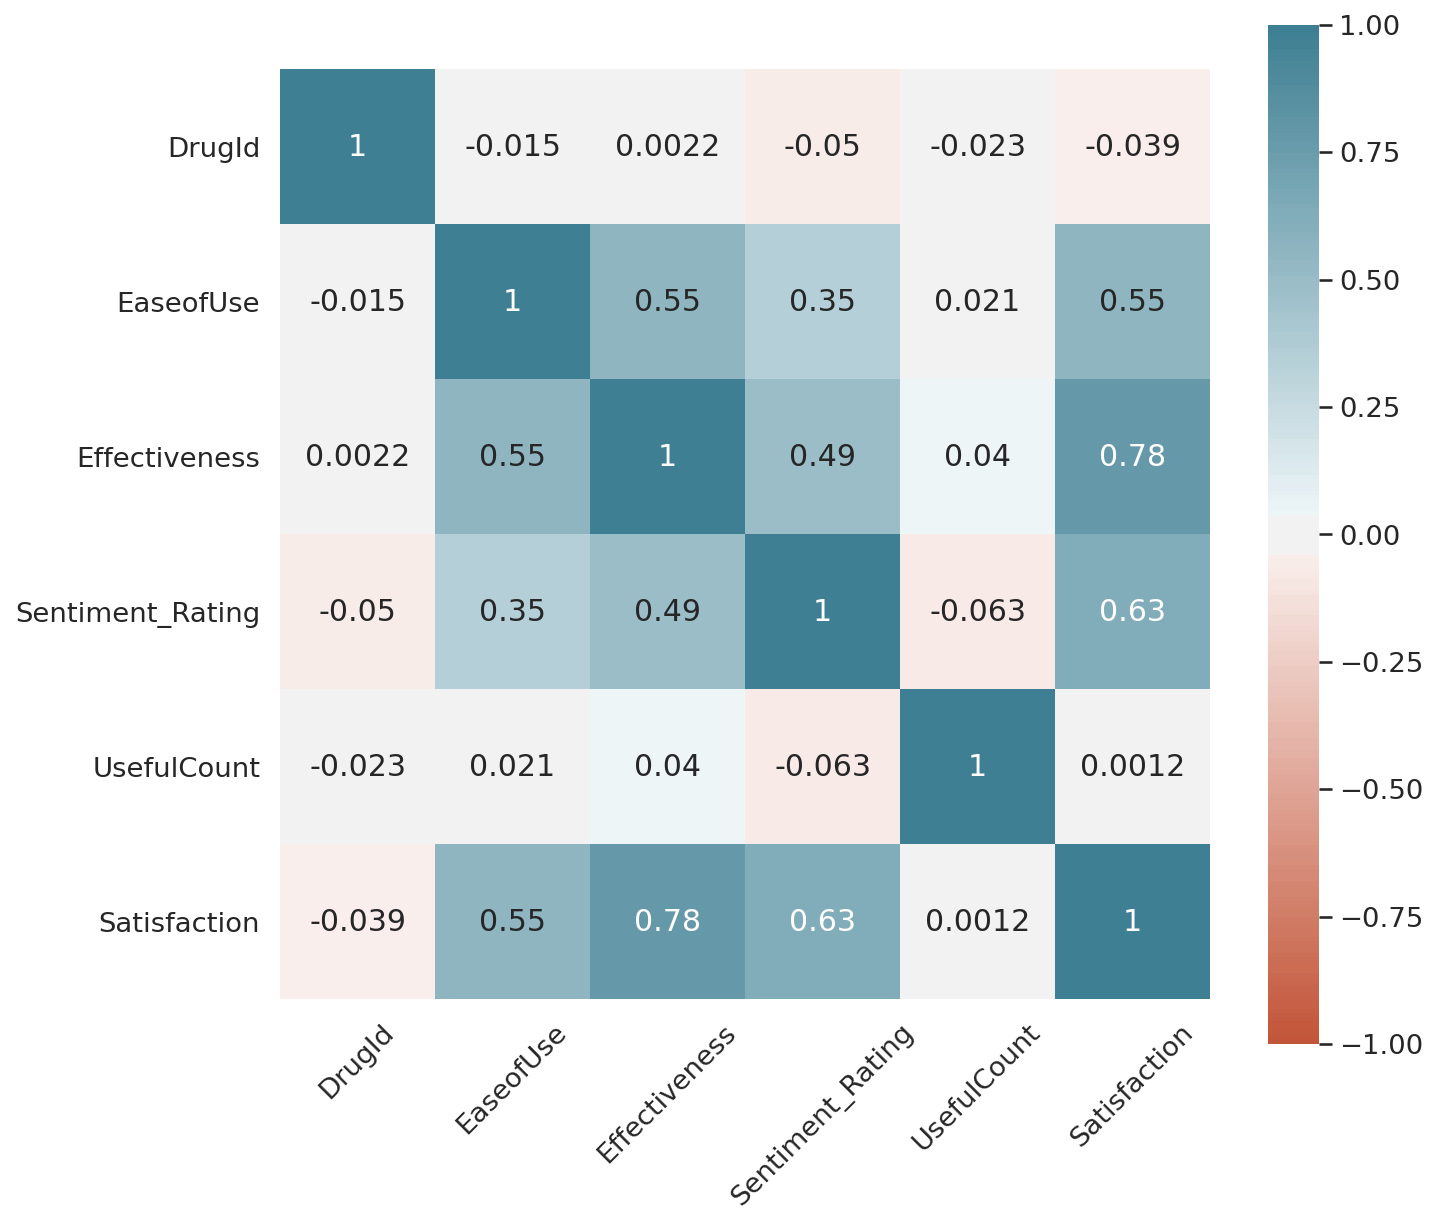

In [57]:
import seaborn as sns
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [10,9]
sns.set(font_scale = 1.2)
corr = sdss_df.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [76]:
sdss_df_fe = sdss_df
# implemented PCA but it did not turn out to be that useful
# encode class labels to integers
#le = LabelEncoder()
#y_encoded = le.fit_transform(sdss_df_fe['Satisfaction'])
#sdss_df_fe['Satisfaction'] = y_encoded

# Principal Component Analysis
#pca = PCA(n_components=3)
#ugriz = pca.fit_transform(sdss_df_fe[['EaseofUse', 'Effectiveness', 'UsefulCount', 'Sentiment_Rating']])

# update dataframe 
#sdss_df_fe = pd.concat((sdss_df_fe, pd.DataFrame(ugriz)), axis=1)
#sdss_df_fe.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
#sdss_df_fe.drop(['EaseofUse', 'Effectiveness', 'UsefulCount', 'Sentiment_Rating'], axis=1, inplace=True)

sdss_df_fe.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Sentiment_Rating,Sex,Sides,UsefulCount,Satisfaction
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,4
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,4
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,5,Female,,0,2
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,0
4,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,0


In [77]:
#dropping unrelevant columns 
sdss_df_fe.drop(['Age', 'Date', 'Drug', 'Reviews', 'Sex'], axis=1, inplace=True)

In [78]:
sdss_df_fe.head()

,Condition,DrugId,EaseofUse,Effectiveness,Sentiment_Rating,Sides,UsefulCount,Satisfaction
0,Stuffy Nose,146724,5,5,5,"Drowsiness, dizziness , dry mouth /nose/thro...",0,4
1,Cold Symptoms,146724,5,5,5,"Drowsiness, dizziness , dry mouth /nose/thro...",1,4
2,Other,144731,2,3,5,,0,2
3,Other,144731,2,2,1,,0,0
4,Other,144731,1,1,1,,1,0


In [79]:
#installing VTreat, as we have non integer based values in our dataset
!pip install vtreat

In [80]:
import vtreat

In [81]:
#we seek numerical output for all our column values, hence we use NumericOutcomeTreatment
plan = vtreat.NumericOutcomeTreatment(outcome_name="Satisfaction",params=vtreat.vtreat_parameters({'filter_to_recommended':False}))

In [82]:
#setting the target and features for modeling, target being Satisfaction column
plan.fit(sdss_df_fe, sdss_df_fe["Satisfaction"])

vtreat.vtreat_api.NumericOutcomeTreatment(outcome_name='Satisfaction', cols_to_copy=['Satisfaction'], )

Now examine the score frame, which gives information about each new variable, including its type, which original variable it is derived from, its (cross-validated) correlation with the outcome, and its (cross-validated) significance as a one-variable linear model for the outcome.

In [83]:
plan.score_frame_

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,R2,significance,vcount,default_threshold,recommended
0,DrugId,DrugId,clean_copy,False,True,-0.039095,0.001528,3.954059e-35,5.0,0.040000,True
1,EaseofUse,EaseofUse,clean_copy,False,True,0.551458,0.304106,0.000000e+00,5.0,0.040000,True
2,Effectiveness,Effectiveness,clean_copy,False,True,0.780908,0.609817,0.000000e+00,5.0,0.040000,True
3,Sentiment_Rating,Sentiment_Rating,clean_copy,False,True,0.633558,0.401395,0.000000e+00,5.0,0.040000,True
4,UsefulCount,UsefulCount,clean_copy,False,True,0.001200,0.000001,7.044360e-01,5.0,0.040000,False
5,Condition_impact_code,Condition,impact_code,True,True,0.237158,0.056244,0.000000e+00,2.0,0.100000,True
6,Condition_deviation_code,Condition,deviation_code,True,True,-0.086944,0.007559,5.203415e-167,2.0,0.100000,False
7,Condition_prevalence_code,Condition,prevalence_code,False,True,0.013218,0.000175,2.919033e-05,2.0,0.100000,True
8,Condition_lev_Pain,Condition,indicator_code,False,True,0.104639,0.010949,2.211397e-241,3.0,0.066667,True
9,Condition_lev_Other,Condition,indicator_code,False,True,-0.021973,0.000483,3.684744e-12,3.0,0.066667,True


In [84]:
dTreated = plan.transform(sdss_df_fe)
dTreated

/usr/local/lib/python3.6/dist-packages/vtreat/vtreat_api.py:109: UserWarning: possibly called transform on same data used to fit
(this causes over-fit, please use fit_transform() instead)
  "(this causes over-fit, please use fit_transform() instead)")


,Satisfaction,DrugId,EaseofUse,Effectiveness,Sentiment_Rating,UsefulCount,Condition_impact_code,Condition_deviation_code,Condition_prevalence_code,Condition_lev_Pain,Condition_lev_Other,Condition_lev_High Blood Pressure,Sides_impact_code,Sides_deviation_code,Sides_prevalence_code
0,4,146724.0,5.0,5.0,5.0,0.0,0.033414,1.718146,0.001490,0.0,0.0,0.0,1.019466,1.484138,0.000470
1,4,146724.0,5.0,5.0,5.0,1.0,-0.531780,1.614679,0.003990,0.0,0.0,0.0,1.019466,1.484138,0.000470
2,2,144731.0,2.0,3.0,5.0,0.0,-0.095991,1.644010,0.117204,0.0,1.0,0.0,-0.222787,1.723198,0.035674
3,0,144731.0,2.0,2.0,1.0,0.0,-0.095991,1.644010,0.117204,0.0,1.0,0.0,-0.222787,1.723198,0.035674
4,0,144731.0,1.0,1.0,1.0,1.0,-0.095991,1.644010,0.117204,0.0,1.0,0.0,-0.222787,1.723198,0.035674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,1,4520.0,5.0,3.0,3.0,4.0,-0.044575,1.559825,0.001750,0.0,0.0,0.0,0.106440,1.560750,0.002530
99984,4,13706.0,5.0,5.0,5.0,1.0,0.297732,1.647747,0.002730,0.0,0.0,0.0,-0.137559,1.605796,0.003590
99985,0,13706.0,1.0,1.0,5.0,1.0,-0.095991,1.644010,0.117204,0.0,1.0,0.0,-0.137559,1.605796,0.003590
99986,0,20420.0,1.0,4.0,1.0,4.0,-0.484337,1.618790,0.037935,0.0,0.0,0.0,-0.486857,1.715701,0.001910


In [85]:
#checking for Null Values
dTreated.isnull().sum()

Satisfaction                         0.0
DrugId                               0.0
EaseofUse                            0.0
Effectiveness                        0.0
Sentiment_Rating                     0.0
UsefulCount                          0.0
Condition_impact_code                0.0
Condition_deviation_code             0.0
Condition_prevalence_code            0.0
Condition_lev_Pain                   0.0
Condition_lev_Other                  0.0
Condition_lev_High Blood Pressure    0.0
Sides_impact_code                    0.0
Sides_deviation_code                 0.0
Sides_prevalence_code                0.0
dtype: float64

In [86]:
#printing dtype for all columns, to identify sparse dtypes for columns
print(dTreated.dtypes)

Satisfaction                                        int64
DrugId                                            float64
EaseofUse                                         float64
Effectiveness                                     float64
Sentiment_Rating                                  float64
UsefulCount                                       float64
Condition_impact_code                             float64
Condition_deviation_code                          float64
Condition_prevalence_code                         float64
Condition_lev_Pain                   Sparse[float64, 0.0]
Condition_lev_Other                  Sparse[float64, 0.0]
Condition_lev_High Blood Pressure    Sparse[float64, 0.0]
Sides_impact_code                                 float64
Sides_deviation_code                              float64
Sides_prevalence_code                             float64
dtype: object


In [87]:
#dropping sparse dtype columns
dTreated.drop(['Condition_lev_Pain', 'Condition_lev_Other', 'Condition_lev_High Blood Pressure'], axis=1, inplace=True)

In [88]:
print(dTreated.dtypes)

Satisfaction                   int64
DrugId                       float64
EaseofUse                    float64
Effectiveness                float64
Sentiment_Rating             float64
UsefulCount                  float64
Condition_impact_code        float64
Condition_deviation_code     float64
Condition_prevalence_code    float64
Sides_impact_code            float64
Sides_deviation_code         float64
Sides_prevalence_code        float64
dtype: object


In [89]:
#Scaling our output Column
scaler = MinMaxScaler()
sdss = scaler.fit_transform(dTreated.drop('Satisfaction', axis=1))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(sdss, dTreated['Satisfaction'], test_size=0.33)

In [91]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 67.05
Time consumed for training: 0.251 seconds
Time consumed for prediction: 2.92570 seconds


In [92]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(dTreated.drop('Satisfaction', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, dTreated['Satisfaction'], test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 64.66
Time consumed for training: 0.026 seconds
Time consumed for prediction: 0.01697 seconds


In [93]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 68.66
Time consumed for training: 13.755
Time consumed for prediction: 0.54707 seconds


In [94]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 71.97
Time consumed for training: 0.964 seconds
Time consumed for prediction: 0.10673 seconds


In [95]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))


Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 68.08
Time consumed for training: 169.728 seconds
Time consumed for prediction: 53.06947 seconds


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)

training_start = time.perf_counter()
gbk.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gbk.predict(X_test)
prediction_end = time.perf_counter()
acc_gbk = (preds == y_test).sum().astype(float) / len(preds)*100
gbk_train_time = training_end-training_start
gbk_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_gbk))
print("Time consumed for training: %4.3f seconds" % (gbk_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gbk_prediction_time))



Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 68.74
Time consumed for training: 50.270 seconds
Time consumed for prediction: 0.31576 seconds


In [97]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[7733  409  487  285  215]
 [1249  645  938  310  147]
 [ 664  301 2513 1063  480]
 [ 237   45  623 3871 1124]
 [ 189   29  152 1367 7921]]
69.0


In [98]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
training_start = time.perf_counter()
LR.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = LR.predict(X_test)
prediction_end = time.perf_counter()
acc_LR = (preds == y_test).sum().astype(float) / len(preds)*100
LR_train_time = training_end-training_start
LR_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's LR Classifier's prediction accuracy is: %3.2f" % (acc_LR))
print("Time consumed for training: %4.3f seconds" % (LR_train_time))
print("Time consumed for prediction: %6.5f seconds" % (LR_prediction_time))


Scikit-Learn's LR Classifier's prediction accuracy is: 64.15
Time consumed for training: 5.062 seconds
Time consumed for prediction: 0.00394 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
#After running all classifier models individually, we compare them all together for best performance
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC', 'LR', 'gbk'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc, acc_LR, acc_gbk],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time, LR_train_time, gbk_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time, LR_prediction_time, gbk_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
Random Forest,71.967149,0.964053,0.106733
gbk,68.742613,50.270040,0.315765
XGBoost,68.657757,13.754519,0.547066
SVC,68.075886,169.728466,53.069471
KNN,67.048520,0.251011,2.925698
Naive Bayes,64.663454,0.025852,0.016970
LR,64.151286,5.062406,0.003935


In [100]:
# cross validating using RFC (Random Forest Classifier)
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72283582 0.7193611  0.7236901  0.72861621 0.71697268 0.72100313
 0.71831617 0.71428571 0.7193611  0.71667413]
Mean: 0.7201116161244828
Standard Deviation: 0.0039154864580216


Decision Trees have the unique property of being able to order features by their ability to split between the classes.

We will now visualize the features and their splitting ability.

In [101]:
importances = pd.DataFrame({
    'Feature': dTreated.drop('Satisfaction', axis=1).columns,
    'Importance': rfc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=True)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
Sides_prevalence_code,0.030410
Condition_prevalence_code,0.033197
Sides_deviation_code,0.035001
Condition_deviation_code,0.036679
Sides_impact_code,0.038339
Condition_impact_code,0.042361
DrugId,0.058517
EaseofUse,0.106044
Sentiment_Rating,0.119018


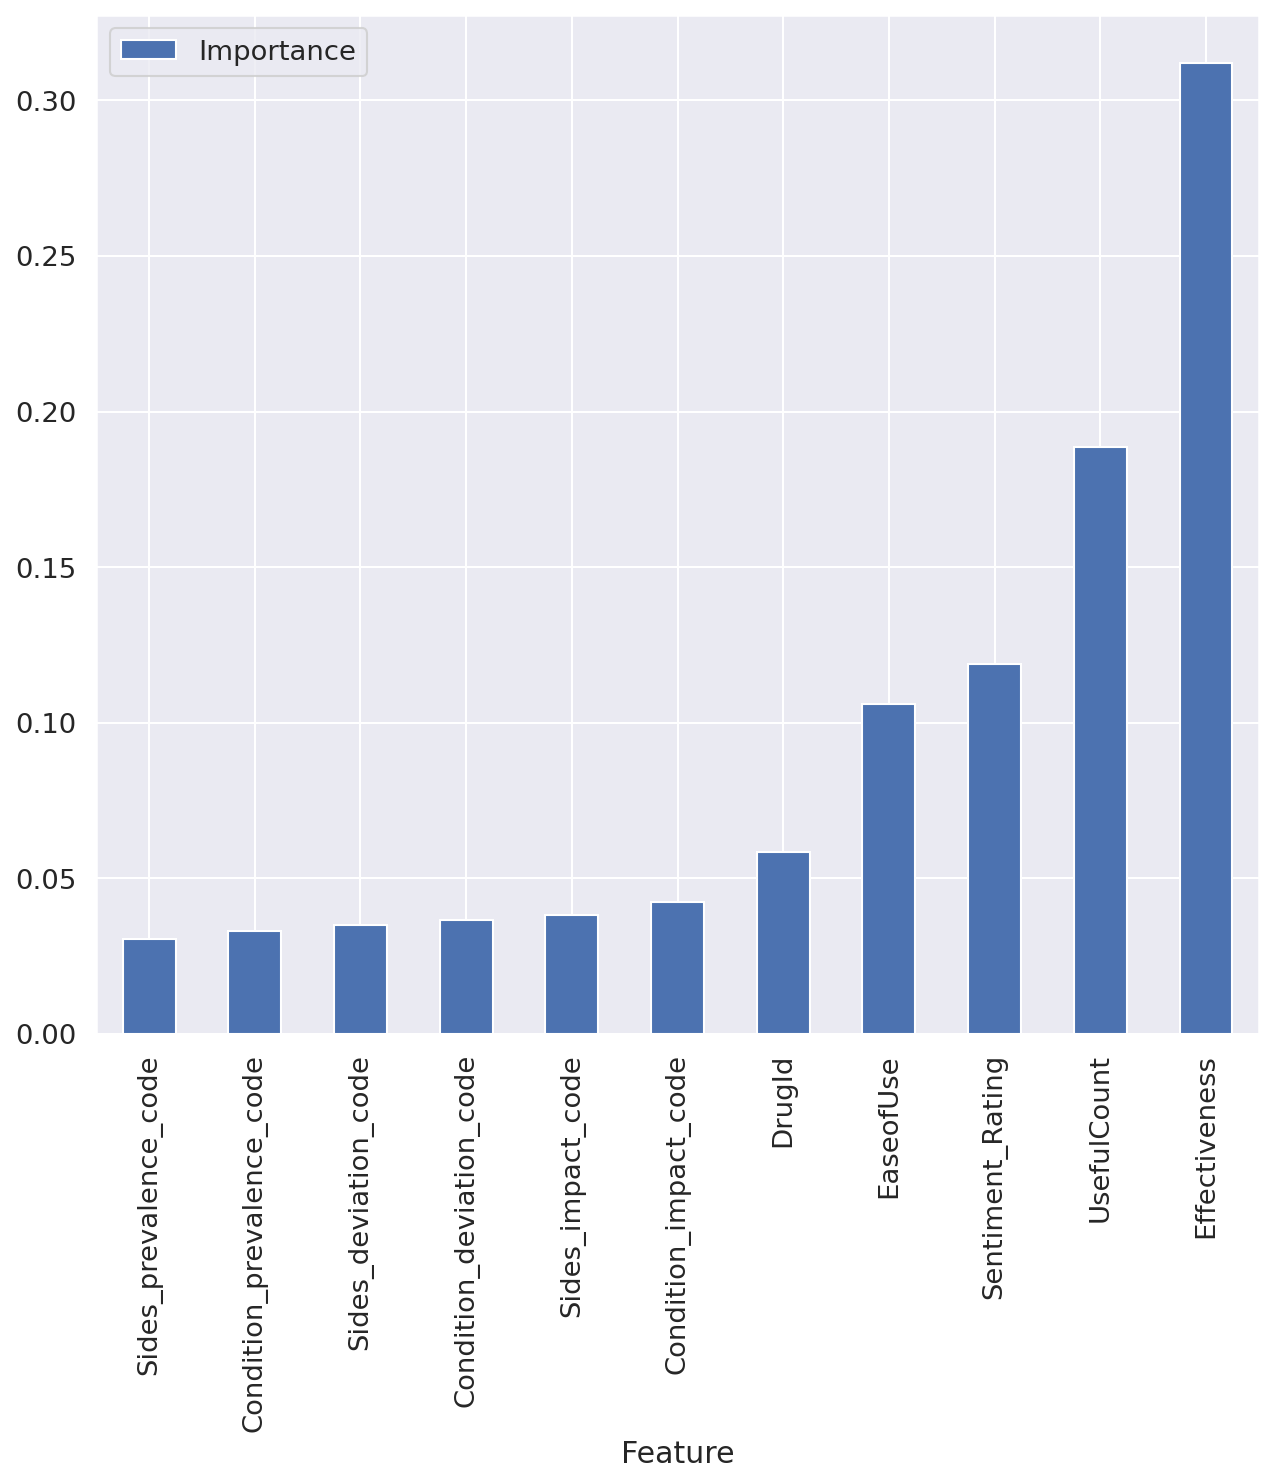

In [102]:
importances.plot.bar()

In [103]:
#RandomForestClassifier
score = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print(score)

from sklearn.model_selection import KFold

# Defining Features and splitting the data as train and test set
features = sdss_df_fe[['EaseofUse', 'Effectiveness', 'UsefulCount', 'Sentiment_Rating']]
target = sdss_df_fe['Satisfaction']
target.isnull().sum().sum()
features = features.fillna(features.mean())
features.isnull().sum().sum()
train_data, test_data, train_targets, test_targets = train_test_split(features, target, test_size = 0.3, shuffle=True, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)
num_folds=2
random_state=42
n_iter=50
kf = KFold(n_splits=num_folds, random_state=random_state)

[0.72731343 0.71891327 0.72398866 0.73204956 0.72160024 0.72339155
 0.71951037 0.71353933 0.71980893 0.7162263 ]
The Train set size  (66991, 11)
The Test set size  (32997, 11)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [104]:
X_train, X_test, y_train, y_test = train_test_split(dTreated.drop('Satisfaction', axis=1), dTreated['Satisfaction'],test_size=0.33)

# Hyperparameter Tuning
Now it's time to look for the optimal hyperparameters - what does this mean?

We will test our chosen model with different values for (almost) each of its tuning parameters and give back the parameters with which the model performed best.

In [105]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 77.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Best parameter values, with best score of accuracy using Hyperparameter tuning
rf_random.best_params_,rf_random.best_score_

({'bootstrap': True,
  'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 2000},
 0.6654391499733753)

In [107]:
#implementing hyperopt tuning with set parameter values
RForest = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=2000)

RForest.fit(X_train, y_train)
preds = RForest.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("RandomForest's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

RandomForest's prediction accuracy WITH optimal hyperparameters is: 69.36


In [108]:
y_pred = RForest.predict(X_test)

In [109]:
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.7158209  0.72667562 0.71339006 0.72428721 0.71592775 0.73608001
 0.72354083 0.72413793 0.7299597  0.71831617]
Mean: 0.7228136166458348
Standard Deviation: 0.006721433677122881


Depending on the run the cross validation results vary from a little lower and a little better than before.

This indicates that the parameter tuning was not as effective as expected - this could mean that RFC was actually close to its maximum performance capability on this data set.

As we still have a good performance we will now continue with further evaluation of the performance of our model!

In [110]:
# class 0 represents 1, 1 is 2, 2 is 3, 3 is 4, 4 is 5 in actual dataset
unique, counts = np.unique(dTreated['Satisfaction'], return_counts=True)
dict(zip(unique, counts))

{0: 27494, 1: 10037, 2: 15234, 3: 18055, 4: 29168}

In [115]:
predictions = cross_val_predict(RForest, sdss, dTreated['Satisfaction'], cv=3)
confusion_matrix(dTreated['Satisfaction'], predictions)

array([[23688,   898,  1238,   696,   974],
       [ 4738,  1237,  2532,   946,   584],
       [ 2976,   566,  6943,  3241,  1508],
       [ 1102,    51,  2422, 10848,  3632],
       [  492,    26,   655,  3864, 24131]])

# Precision and Recall Scores

In [116]:
print("Precision:", precision_score(dTreated['Satisfaction'], predictions, average='micro'))
print("Recall:",recall_score(dTreated['Satisfaction'], predictions, average='micro'))

Precision: 0.6685502260271232
Recall: 0.6685502260271232


# F1 Score

In [117]:
print("F1-Score:", f1_score(dTreated['Satisfaction'], predictions, average='micro'))

F1-Score: 0.6685502260271232


In [118]:
# Classification report
import sklearn.metrics as metrics
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(dTreated['Satisfaction'], predictions))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.72      0.86      0.78     27494
           1       0.45      0.12      0.19     10037
           2       0.50      0.46      0.48     15234
           3       0.55      0.60      0.58     18055
           4       0.78      0.83      0.80     29168

    accuracy                           0.67     99988
   macro avg       0.60      0.57      0.57     99988
weighted avg       0.65      0.67      0.65     99988



# ROC Curve for just one label class

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_test)
y_test1 = lb.transform(y_test)
y_pred1= lb.transform(y_pred)
roc_auc_score(y_test1, y_pred1, average="macro")

0.7613959953964001

In [120]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp



statis=dTreated['Satisfaction']
y = label_binarize(statis, classes=[0, 1, 2, 3, 4])
n_classes = y.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])




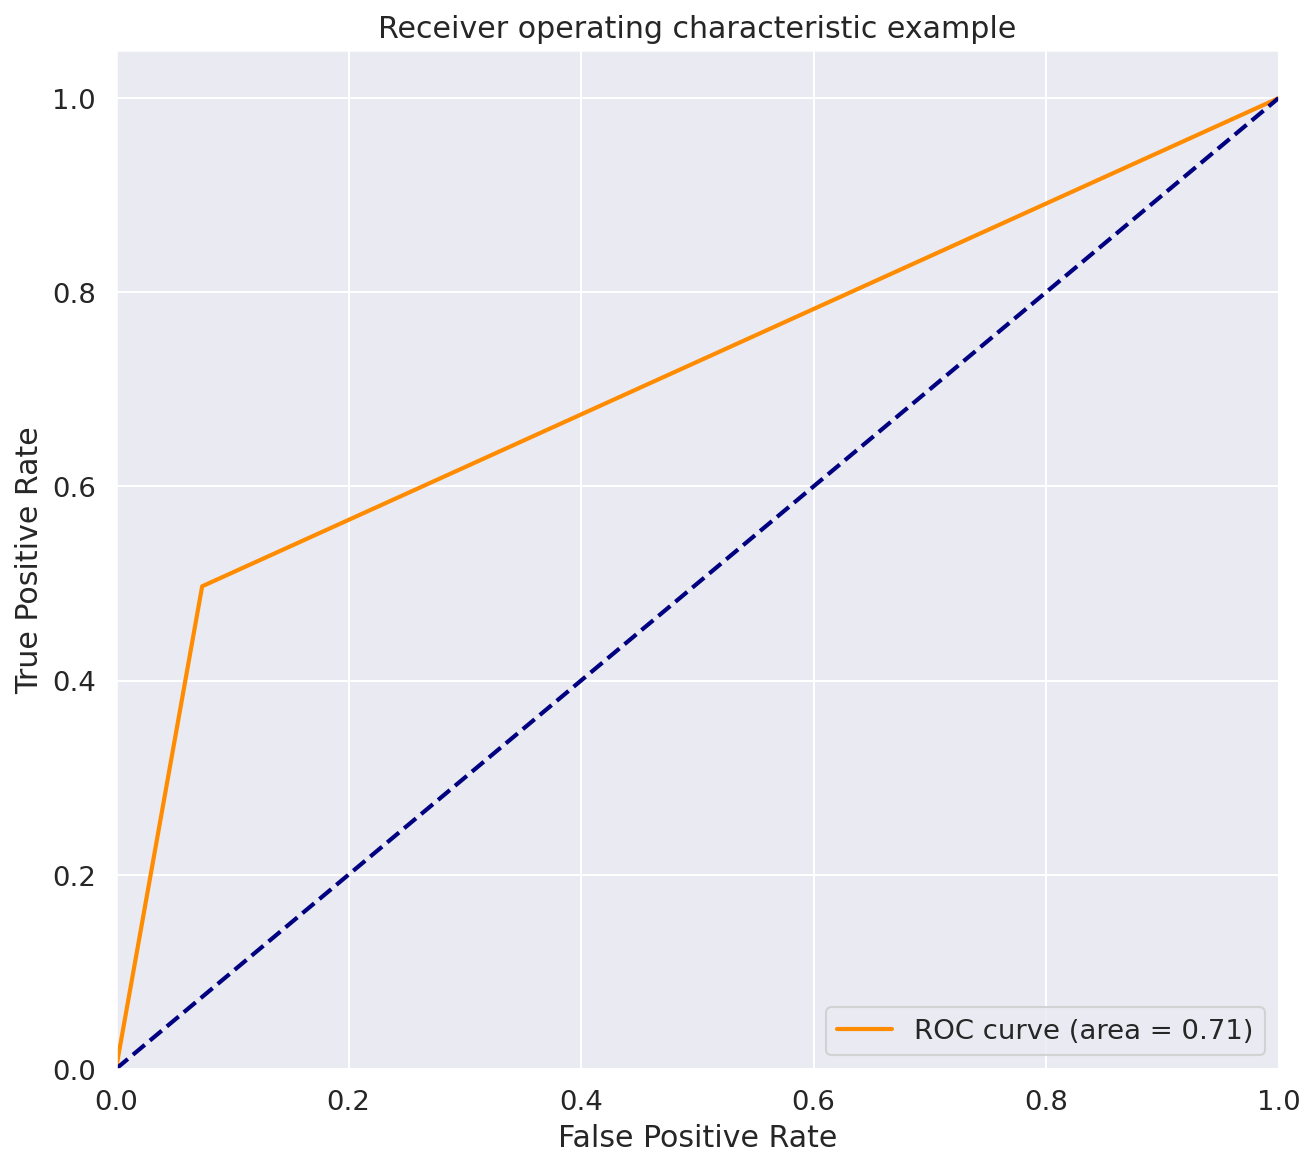

In [121]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for multi-label class

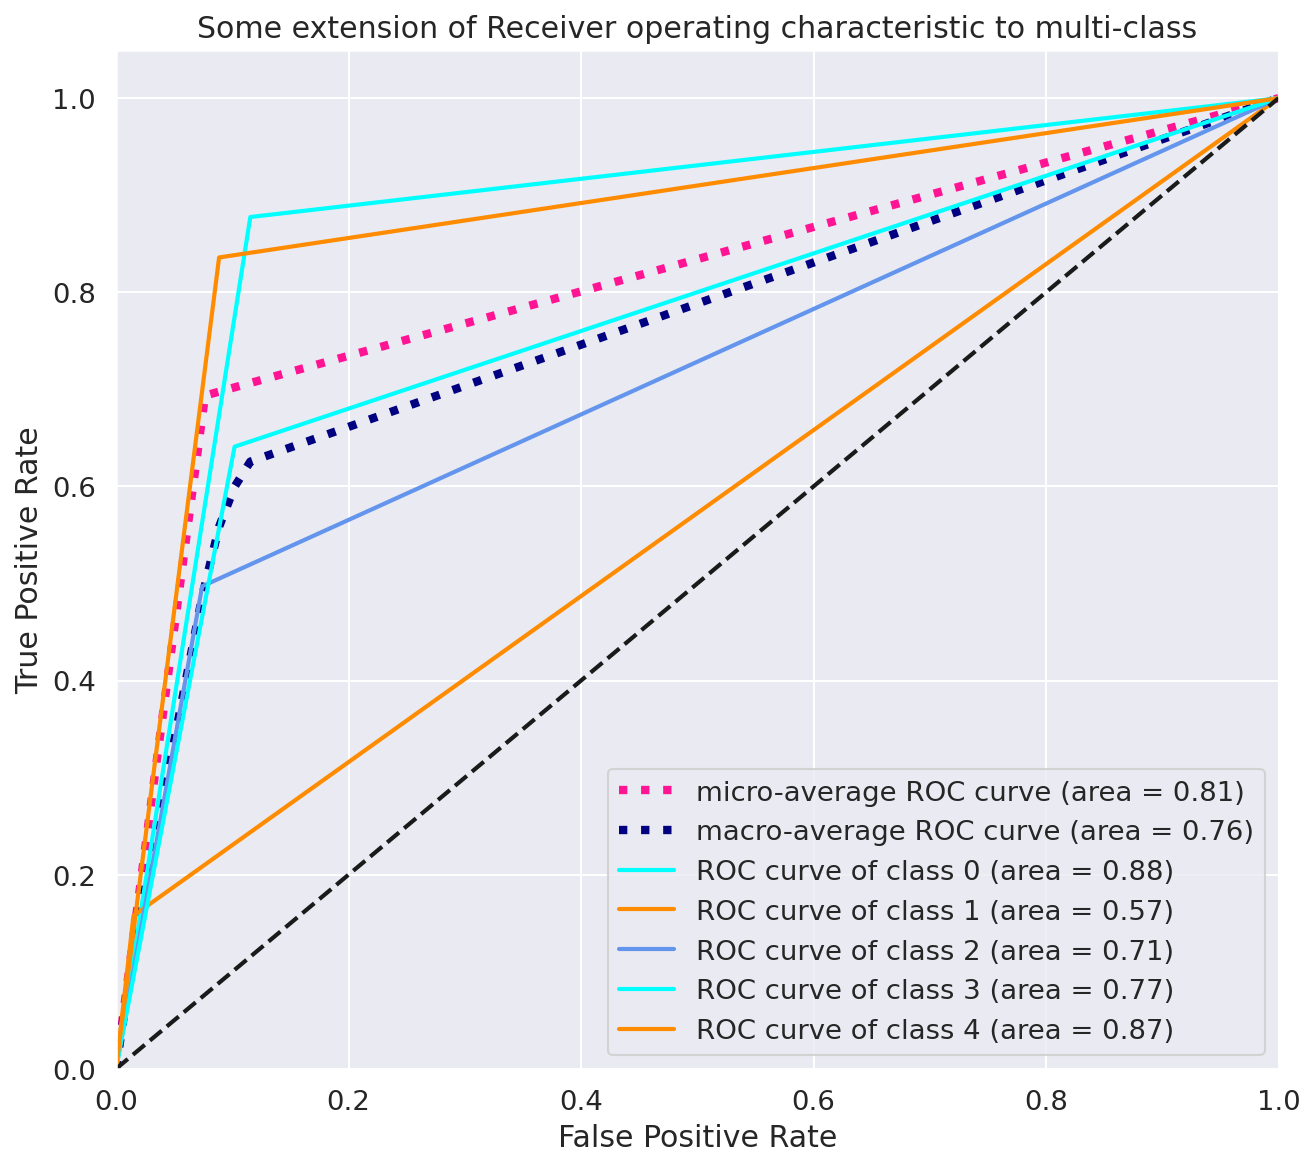

In [122]:
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()